<a href="https://colab.research.google.com/github/macorony/NeuralNetwork/blob/main/train_model_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [121]:
device = ('cuda' if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [122]:
transform = transforms.Compose([transforms.ToTensor()])

In [145]:
train_data = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [147]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)
test_loader =  torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=True, num_workers=2)

In [125]:
for i, data in enumerate(train_loader):
  print(train_loader)
  dummy_data = data
  break

In [126]:
dummy_data[0].shape

torch.Size([4, 3, 32, 32])

In [127]:
def loader_show(dataloader):
  images, labels = next(iter(train_loader))
  grid = torchvision.utils.make_grid(images)
  plt.imshow(grid.permute(1,2,0))
  plt.show()

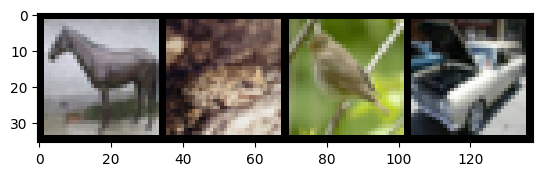

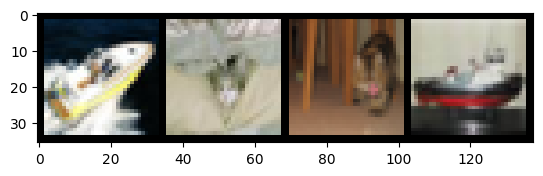

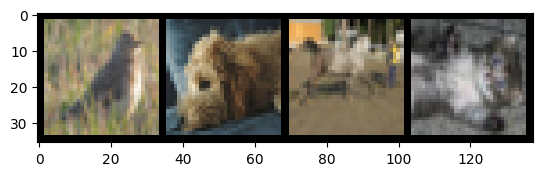

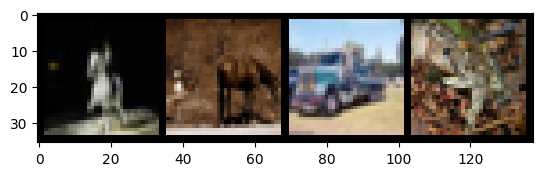

In [128]:
for _ in range(4):
  loader_show(train_loader)

## Model

In [152]:
class NNmodel(nn.Module):
  def __init__(self):
    super(NNmodel, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(400, 120)
    self.fc2 = nn.Linear(120, 80)
    self.fc3 = nn.Linear(80, 10)

  def forward(self, input):
    x = self.pool(F.relu(self.conv1(input)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    output = self.fc3(x)
    return output

model = NNmodel()
print(model)

NNmodel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)


## Loss function

In [153]:
loss_fun = nn.CrossEntropyLoss()

In [154]:
# a dummy test for loss function
dummy_label = torch.arange(0, 4)
dummy_output = model(images)
print(dummy_label.shape)
print(dummy_output.shape)
loss = loss_fun(dummy_output, dummy_label)
print(loss.item())

torch.Size([4])
torch.Size([4, 10])
2.287069320678711


## Optimizer

In [157]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [156]:
model

NNmodel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

## Training

In [144]:
for epoch in range(1):
  running_loss = 0.0
  for i, data in enumerate(train_loader):
    inputs, labels = data
    # zero gradient for every batch
    optimizer.zero_grad()

    outputs = model(inputs)

    loss = loss_fun(outputs, labels)

    loss.backward()

    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f"[{epoch + 1}, {i + 1: 5d}] loss: {running_loss / 2000:.3f}")
      running_loss = 0.0

[1,  2000] loss: 2.299
[1,  4000] loss: 2.108
[1,  6000] loss: 1.909
[1,  8000] loss: 1.752
[1,  10000] loss: 1.661
[1,  12000] loss: 1.580


In [143]:
for i in range(1):
  print(i)

0


In [158]:
Path = '/content/drive/MyDrive/file_transmission/cifar10_net.pth'
torch.save(model.state_dict(), Path)

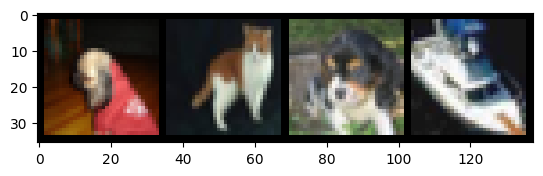

In [159]:
loader_show(test_loader)

In [109]:
images, labels = next(iter(train_loader))

In [98]:
dummy_labels = torch.tensor([1,5,3,7])
print(dummy_labels.shape)
dummy_outputs = torch.rand(4,10)
print(dummy_outputs.shape)

torch.Size([4])
torch.Size([4, 10])


In [93]:
dummy_output.shape

torch.Size([4, 100])

In [83]:
dummy_output.shape

torch.Size([4, 100])

In [60]:
images.shape

torch.Size([4, 3, 32, 32])

In [61]:
output = model(images)

In [62]:
output

tensor([[ 2.4645e-02, -2.5426e-02, -9.6567e-02, -2.6704e-02,  4.5618e-02,
          2.0543e-02,  6.3121e-03,  7.0688e-02,  7.9460e-02,  6.0939e-02,
         -6.7667e-02, -1.0765e-02,  4.1424e-02,  5.7659e-02, -4.5872e-02,
          4.9553e-02,  4.4185e-02, -3.6208e-02, -3.7393e-02, -6.3389e-02,
          1.8001e-02, -4.8261e-02,  1.2380e-02,  4.2904e-02, -3.7671e-02,
         -7.0899e-03, -4.8289e-02,  1.7584e-02, -6.5964e-02,  1.0825e-01,
          6.0549e-02, -2.0725e-02, -1.3701e-02, -3.4351e-02, -7.8076e-02,
          7.9972e-02, -7.2672e-03,  3.5116e-03, -5.8536e-02,  1.9806e-02,
         -1.3108e-02,  6.7720e-04, -5.7241e-02,  4.1875e-02, -1.3514e-02,
         -2.6041e-02, -4.3034e-02, -3.6570e-02,  6.8652e-03,  1.1566e-01,
         -8.5213e-02,  2.6491e-02,  5.4471e-02, -1.1101e-02, -3.4825e-02,
          1.6248e-02, -2.3828e-02,  1.6267e-02,  1.4352e-01,  4.8897e-02,
          3.8209e-02, -2.1391e-02, -3.6251e-02, -4.4255e-02, -9.6995e-02,
         -5.4342e-02, -5.3979e-02,  2.